## Problem

Create a target function 𝑓	and a bidimensional dataset 𝐷 and see how the perceptron learningalgorithm works. Choose a random line in the plane as your target function, where one side of theline maps to +1 and the other maps to -1. Choose the inputs 𝑥! of the data set as random points in theplane and evaluate the target function on each 𝑥! to get the corresponding output 𝑦!

### 1. Create the Dataset first

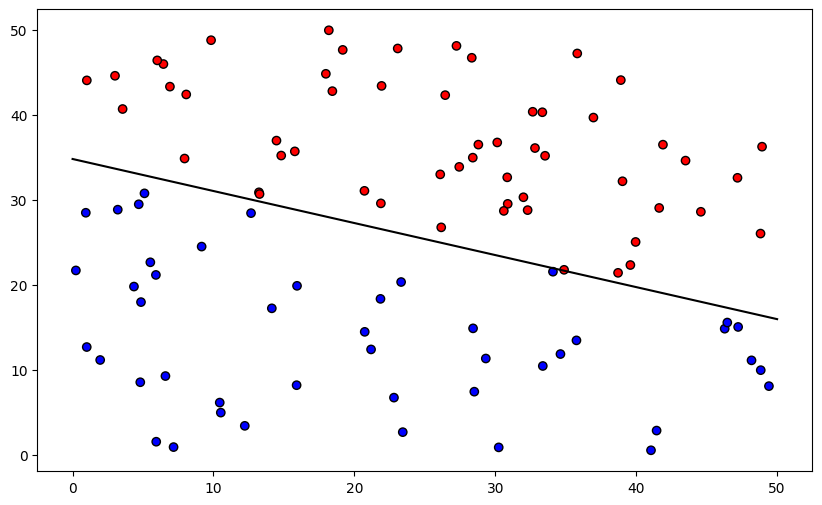

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Using a fixed seed for reproducibility
np.random.seed(0)

# Generate 100 random points in the range [0, 50] for both x and y 😀
x = np.random.uniform(0, 50, 100) 
y = np.random.uniform(0, 50, 100)

# Generate a random slope and intercept for the data classification line
slope = np.random.uniform(-1, 1)
intercept = np.random.uniform(0, 50)

# Classify the points based on their position relative to the line
classification = np.sign(y - (slope * x + intercept)) 

# Plot the points and the classification line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=classification, cmap='bwr', edgecolor='k')
plt.plot([0, 50], [intercept, slope * 50 + intercept], 'k-') # line from (0, intercept) to (50, slope*50 + intercept)
plt.show()

# Create the dataset
dataset = np.column_stack((x, y, classification))


### A). Run the perceptron learning algorithm on your data set and see how long it takes to converge and how well the final hypothesis𝑔 matches your target 𝑓.

In [168]:

# Perceptron Learning Algorithm
def perceptron_learning_algorithm(X, y):
    w = np.zeros(3)  # 3 weights for x, y, and bias
    iteration_count = 0
    X_with_bias = np.column_stack((X, np.ones(X.shape[0]))) # this is to add the bias term
    while True:
        misclassified_points = 0
        for i in range(X.shape[0]): # for each point in the dataset
            if np.sign(np.dot(w, X_with_bias[i])) != y[i]: # if the point is misclassified
                w += y[i] * X_with_bias[i] # update the weights using the formula from the slides
                misclassified_points += 1 
        iteration_count += 1
        if misclassified_points == 0: # if there are no misclassified points
            break # we ballin'
    return w, iteration_count 

# Split the dataset into features and labels
features = dataset[:, :2] # X
labels = dataset[:, 2] # y

# Apply the Perceptron Learning Algorithm
final_weights, total_iterations = perceptron_learning_algorithm(features, labels)

# Print the results
print('Final weights:', dict(zip(['x', 'y', 'bias'], final_weights))) 
print('Total iterations:', total_iterations)


Final weights: {'x': 18.832410800584594, 'y': 50.161036739505995, 'bias': -1744.0}
Total iterations: 300


## B). Plot the examples \({(x_n,y_n)}\) as well as the target function \(f\) on a plane. Be sure to mark the examples from different classes differently.

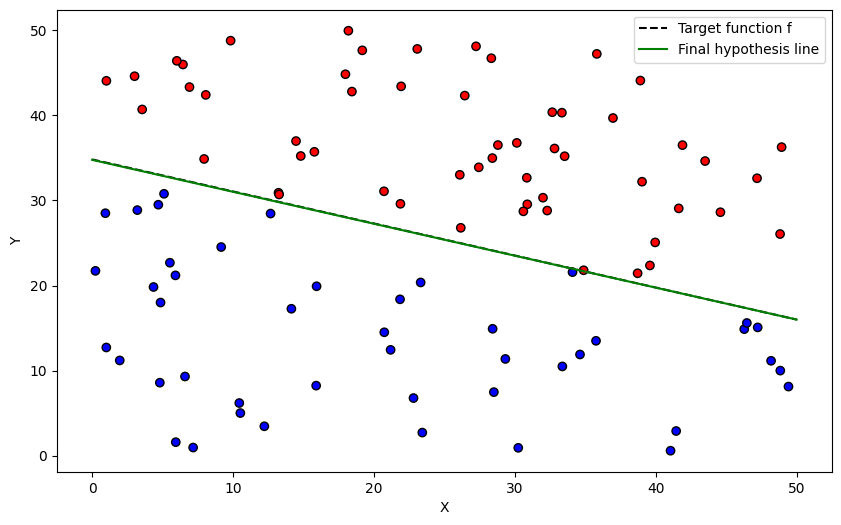

In [169]:
# Plotting the examples and the target function f

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the points with different colors for different classes (red for -1 and blue for +1)
plt.scatter(x, y, c=classification, cmap='bwr', edgecolor='k')

# Plotting the target function f (original classification line)
plt.plot([0, 50], [intercept, slope * 50 + intercept], 'k--', label='Target function f') # these variables were defined earlier in the first block

# Plotting the final hypothesis g (line from the perceptron learning algorithm)
x_values = np.array([0, 50]) 
y_values = (-final_weights[2] - final_weights[0] * x_values) / final_weights[1] # rearranging the equation w0*x + w1*y + w2 = 0 to get y = (-w2 - w0*x) / w1
plt.plot(x_values, y_values, 'g-', label='Final hypothesis line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## C). Report the number of updates that the algorithmtakes before converging.

In [170]:
# already did this two blocks ago but ill reprint it here
print('Total iterations:', total_iterations)

Total iterations: 300


## D). Repeat everything in (a) with another randomly generated data set of size 1000.Compare the results with (a).

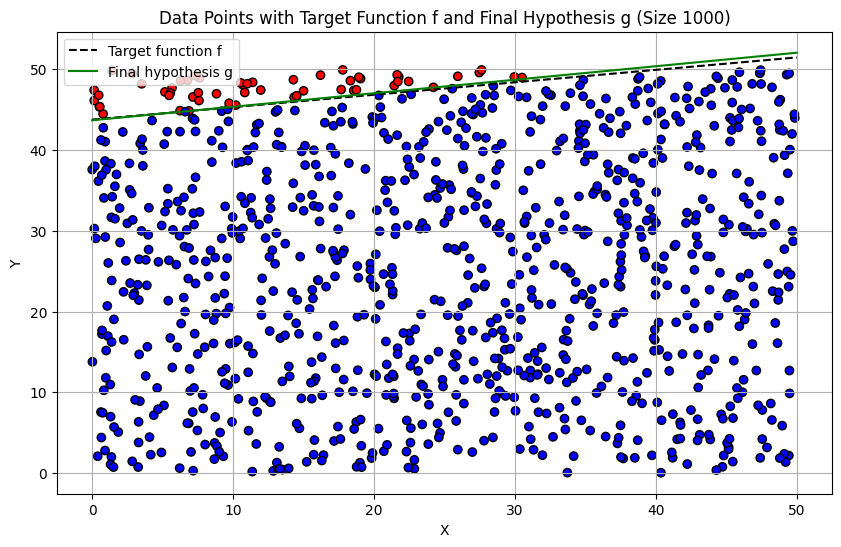

Final weights: {'x': -121.50333177438995, 'y': 726.1740510421682, 'bias': -31723.0}
Total iterations: 37464


In [171]:
# Generate the new dataset of 1000 points
np.random.seed(1) # different seed for different points

# Generate 1000 random points in the range [0, 50] for both x and y
x_large = np.random.uniform(0, 50, 1000)
y_large = np.random.uniform(0, 50, 1000)

# Generate a random slope and intercept for the data classification line
slope_large = np.random.uniform(-1, 1)
intercept_large = np.random.uniform(0, 50)

# Classify the points based on their position relative to the line
classification_larger = np.sign(y_large - (slope_large * x_large + intercept_large))

# Create the dataset for the larger sample
dataset_larger = np.column_stack((x_large, y_large, classification_larger))

# Split the dataset into features and labels
# Split the dataset into features and labels
features_larger = dataset_larger[:, :2]  # X
labels_larger = dataset_larger[:, 2]  # y

# Apply the Perceptron Learning Algorithm to the larger dataset
final_weights_larger, total_iterations_larger = perceptron_learning_algorithm(features_larger, labels_larger)

# Plotting the new dataset and the target function f
plt.figure(figsize=(10, 6))
plt.scatter(x_large, y_large, c=classification_larger, cmap='bwr', edgecolor='k')
plt.plot([0, 50], [intercept_large, slope_large * 50 + intercept_large], 'k--', label='Target function f')
x_values_large = np.array([0, 50])
y_values_large = (-final_weights_larger[2] - final_weights_larger[0] * x_values_large) / final_weights_larger[1]
plt.plot(x_values_large, y_values_large, 'g-', label='Final hypothesis g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points with Target Function f and Final Hypothesis g (Size 1000)')
plt.legend()
plt.grid(True)
plt.show()

# Print the results of the weights
print('Final weights:', dict(zip(['x', 'y', 'bias'], final_weights_larger)))
print('Total iterations:', total_iterations_larger)


### Results comparsion analysis:
As depicted by the graph outputs from both datasets (smaller and larger ones) we can see that when applying the perceptron learning algorithm on the smaller dataset, the algorithm converges faster than the larger dataset. This is because the larger dataset has more data points to be processed and thus takes more time to converge. The number of updates that the algorithm takes before converging is also higher for the larger dataset than the smaller dataset. This is because the larger dataset has more data points to be processed and thus takes more time to converge. 

Additionally, based on the line comparison between the target function and the hypothesis function, we can see that the smaller dataset has a better match between the target function and the hypothesis function than the larger dataset. This inaccurcay can be attributed to the fact that the larger dataset has more data points which makes it harder to find a hypothesis function that matches the target function.

### E). Modify the algorithm such that it takes𝑥! ∈ ℝ^10. Randomly generate a linearlyseparable data set of size 1000 with 𝑥! ∈ℝ^10 and feed the data set to the algorithm.How many updates does the algorithmtake to converge?

In [172]:
# Perceptron Learning Algorithm for higher dimensional data. (10D)
def perceptron_learning_algorithm_10d(X, y):

    # Initialize weights for higher dimensions (10 features + 1 bias term)
    w = np.zeros(X.shape[1] + 1)  # 11 weights (10 for features and 1 for bias)
    iteration_count = 0

    # Add intercept term to the data points
    X_with_bias = np.column_stack((X, np.ones(X.shape[0])))

    # similar logic to the perceptron learning algorithm for 2D data
    while True:
        misclassified_points = 0
        for i in range(X.shape[0]): # for each point in the dataset
            if np.sign(np.dot(w, X_with_bias[i])) != y[i]: # if the point is misclassified
                w += y[i] * X_with_bias[i] # update the weights using the formula from the slides
                misclassified_points += 1
        iteration_count += 1
        if misclassified_points == 0: # if there are no misclassified points
            break # we ballin'

    return w, iteration_count


In [173]:
# Generate the new dataset of 1000 points of 10D 

np.random.seed(0)

# Generate 1000 random points in the range -50 to 50 for 10 dimensions
X_10d  = np.random.uniform(-50, 50, (1000, 10)) # 1000 points with 10 dimensions

# Generate random weights to create a linearly separable dataset
true_weights = np.random.uniform(-1, 1, 11)  # 10 weights for features and 1 for bias

# Calculate the labels using the dot product, ensuring linear separability
labels_10d = np.sign(np.dot(np.column_stack((X_10d, np.ones(1000))), true_weights)) # breakdown: X_10d * true_weights + 1 * true_weights

# Apply the Perceptron Learning Algorithm to the 10D dataset
final_weights_10d, total_iterations_10d = perceptron_learning_algorithm_10d(X_10d, labels_10d)

# Print the results of the weights
print('Final weights:', dict(zip(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9','x10', 'bias'], final_weights_10d)))

# Print the total number of iterations
print('Total iterations:', total_iterations_10d)






Final weights: {'x1': 1484.0392239775529, 'x2': -1907.2721102224261, 'x3': -674.5443401095731, 'x4': -2732.7003505871035, 'x5': -2909.087254031692, 'x6': 2974.2445695951164, 'x7': -44.003327579746866, 'x8': -728.7397192267916, 'x9': -1819.9518268823124, 'x10': 1849.595596918278, 'bias': 948.0}
Total iterations: 791
